# Data Visualizations

The data was processed in prior steps in order to retain only the data that is able to be used for modeling with the goal of price prediction. This is the portion of data that will be visualized. Categories were also collapse to reduce noise and cardinality, which will make visualizations more interpretable.

## Importing Libraries & Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
listings = pd.read_csv(r"../data/listings_cleaner.csv")

## Visualizing Target Variable

In [3]:
# Converting price from string to float
listings["price"] = listings["price"].str.replace("$", "").str.replace(",", "").astype(float)

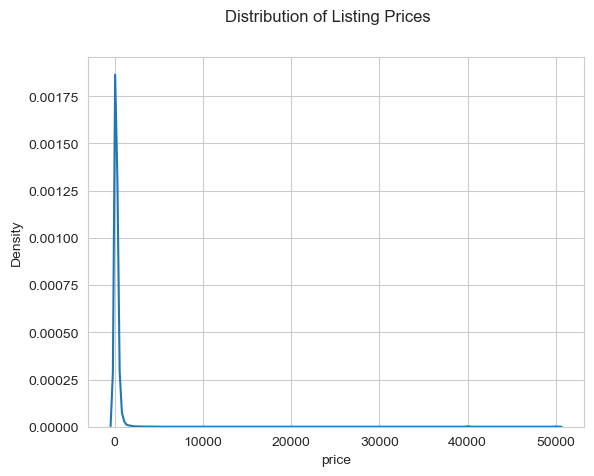

In [4]:
# KDE of Price -- Extremely right skewed
sns.kdeplot(data = listings, x = "price")
plt.suptitle("Distribution of Listing Prices")
plt.show()

In [5]:
listings["price"].describe()

count    245173.000000
mean        289.693739
std        1800.152573
min           3.000000
25%          86.000000
50%         145.000000
75%         250.000000
max       50184.000000
Name: price, dtype: float64

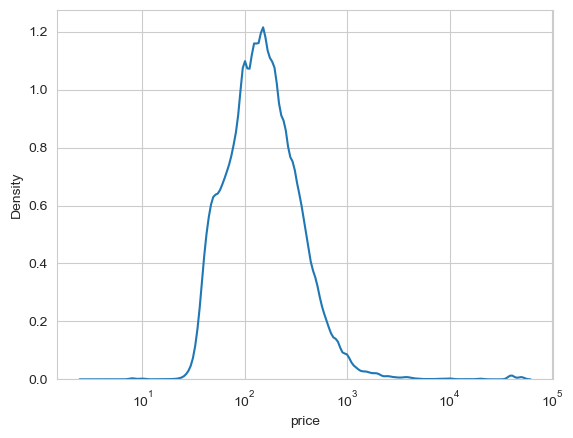

In [6]:
# Viewing log transformed prices - Looks approximately normally distributed after log scaled prices 
sns.kdeplot(data = listings, x = "price", log_scale = (True, False))
plt.show()

In [7]:
# The KDE starts to tail off at 10^3 (listing prices up to $1000), it would be best to retain the end of that tail before it flatlines, $1800 seems fair and generous
listings_trimmed = listings[listings["price"] <= 1800]

In [8]:
# Checking size of the data - Only 1612 ridiciously skewed listings were removed - Some prices went up to 50k
len(listings) - len(listings_trimmed)

1612

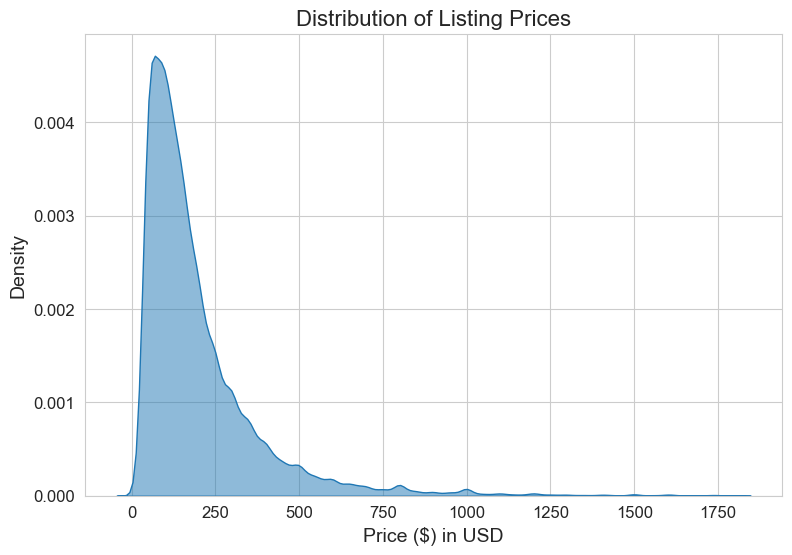

In [9]:
# Still pretty right skewed, but not to the point where an ensemble method cannot handle it.
plt.figure(figsize = (9, 6))
sns.kdeplot(data = listings_trimmed, x = "price", fill = True, alpha = 0.5) 
plt.title("Distribution of Listing Prices", fontsize = 16)
plt.ylabel("Density", fontsize = 14)
plt.yticks(fontsize = 12)
plt.xlabel("Price ($) in USD", fontsize = 14)
plt.xticks(fontsize = 12)
plt.show()

# Bedroom/Bathroom Variables

In [10]:
# Spearman"s correlation for bed/bath and price
spearman_bedbath = listings[["price", "bedrooms", "bathrooms"]].corr(method = "spearman")

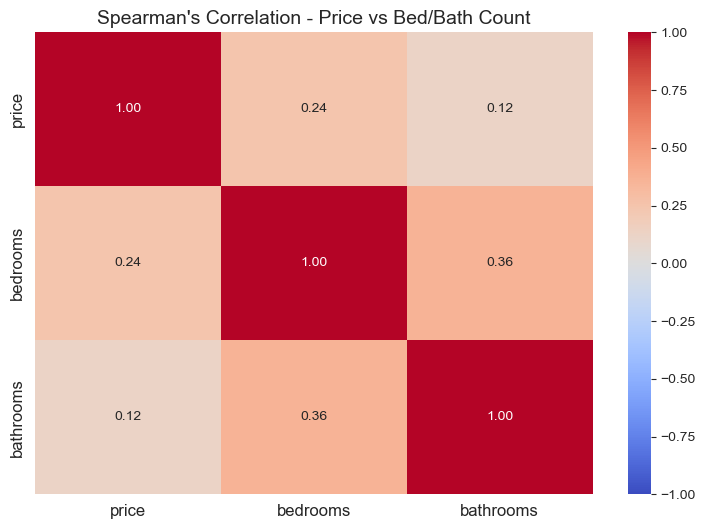

In [11]:
# Heatmap of spearman correlations between price, bedrooms, and bathrooms
plt.figure(figsize = (9, 6))

sns.heatmap(spearman_bedbath, annot = True, cmap = "coolwarm", fmt = ".2f", vmin = -1, vmax = 1)

plt.title("Spearman's Correlation - Price vs Bed/Bath Count", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# There is a mild to moderate positive correlation between bedroom/bathroom count and price.
# Spearman"s correlation was used as opposed to Pearson"s to avoid the assumption of a linear correlation, as the relation can be exponential or nonlinear.
# The mild/moderate positive correlation shows that bed/bath count does influence price, but not heavily, indicating that other features are likely more influential.

In [12]:
listings.columns

Index(['Unnamed: 0', 'accommodates', 'availability_30', 'availability_365',
       'bathrooms', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'description',
       'has_availability', 'host_acceptance_rate', 'host_has_profile_pic',
       'host_id', 'host_identity_verified', 'host_is_superhost',
       'host_listings_count', 'host_neighbourhood', 'host_response_rate',
       'host_response_time', 'host_total_listings_count', 'id',
       'instant_bookable', 'last_scraped', 'latitude', 'longitude',
       'maximum_nights', 'minimum_nights', 'name',
       'neighbourhood_group_cleansed', 'number_of_reviews', 'price',
       'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
 

# Seasonal Effects & Prices

C:\Users\adria\AppData\Local\Temp\ipykernel_42856\158874353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_trimmed["last_scraped"] = pd.to_datetime(listings_trimmed["last_scraped"])


Text(0, 0.5, 'Median Price')

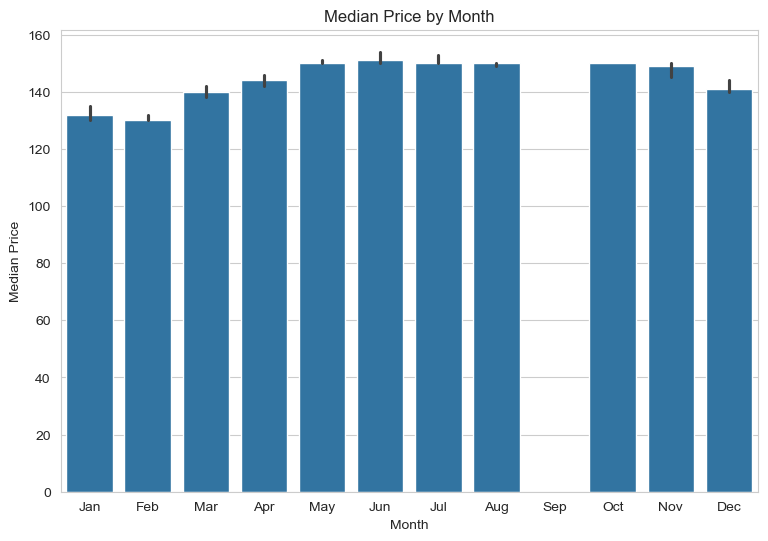

In [13]:
# Converting last_scraped to datetime
listings_trimmed["last_scraped"] = pd.to_datetime(listings_trimmed["last_scraped"])

# Ordering months chronologically
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(9, 6))

# Barplot of listing month vs median price
sns.barplot(
    x = listings_trimmed["last_scraped"].dt.strftime("%b"),  # Shortening names to first three letters.
    y = listings_trimmed["price"],
    order = month_order,
    estimator = "median"
)

plt.title("Median Price by Month")
plt.xlabel("Month")
plt.ylabel("Median Price")

# Slightly higher prices in the summer and fall with very little fluctuations in each month (low standard deviation in error bars.)
# There was no data scraped in September, so this checks out.

# Price vs Review Ratings

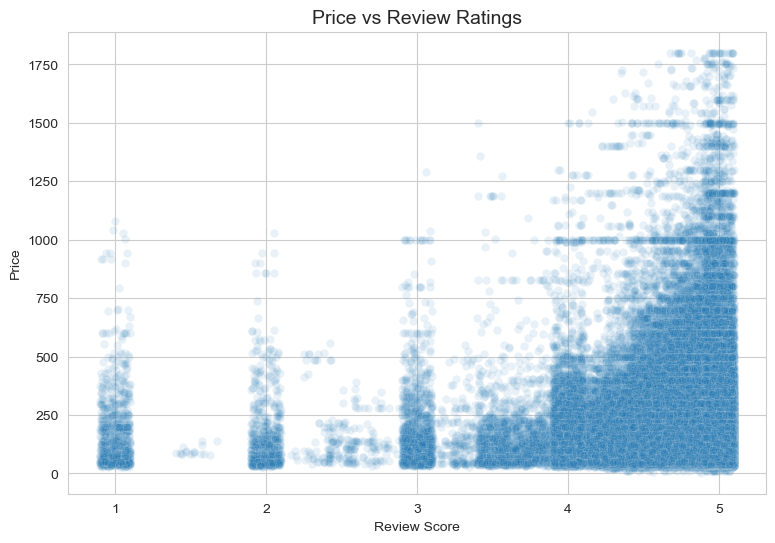

In [14]:
# Adding Jitter (High concentrations around whole numbers for reviews)
jittered_reviews = listings_trimmed['review_scores_rating'] + np.random.uniform(-0.1, 0.1, size = len(listings_trimmed))

plt.figure(figsize = (9, 6))

sns.scatterplot(x = jittered_reviews, y=listings_trimmed['price'], alpha = 0.1)

plt.title("Price vs Review Ratings", fontsize = 14)
plt.xlabel("Review Score", fontsize = 10)
plt.ylabel("Price", fontsize = 10)
plt.show()

# High concentration around 4+ out of 5 ratings, most higher prices are around higher reviews, but there's also just a large portion in that range anyway.

In [15]:
# Updating CSV - prices as floats and filtered to non-outlier prices
listings_trimmed.to_csv(r"../data/listings_cleaner.csv")